**Created by Berkay Alan**

**Exploratory Data Analysis(EDA) - Visualization**

**23 of March, 2021**

**For more Tutorial: https://github.com/berkayalan**

## Content

- What is Exploratory data analysis(EDA) ?

- Importing Libraries

- **Plotnine - ggplot**

    - Line Plot
    
    - Bar Plot
    
    - Scatter Plot
    
    - Histograms
    
    - Density Plot
    
    - Box Plot
    
    - Violin Plot

## What is Exploratory data analysis(EDA) ?

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

 It is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important

## Importing Libraries

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [655]:
from pandas.plotting import scatter_matrix

In [662]:
from pandas.plotting import andrews_curves

In [673]:
from pandas.plotting import autocorrelation_plot

In [3]:
from matplotlib import pyplot as plt

In [4]:
from matplotlib import font_manager as fm

In [5]:
from plotnine import ggplot, aes, geom_line

In [707]:
import plotnine

In [862]:
import plotly.express as px

In [1057]:
import plotly.figure_factory as ff

In [7]:
import plotly.graph_objects as go

In [8]:
import numpy as np

In [97]:
from datetime import datetime, timedelta #It's for time series

## Plotnine - ggplot

Plotnine is based on ggplot2. ggplot2 is a data visualization package for the statistical programming language R. ggplot2 is an implementation of grammar of graphics.

aes (aesthetics) used to create new ggplot object and at geom level.

## Line Plots

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

In [708]:
experience = [1,3,4,5,7,8,10,12]

salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

df = pd.DataFrame({"Experience":experience,"Salary": salary})

In [709]:
df.head()

,Experience,Salary
0,1,6500
1,3,9280
2,4,12050
3,5,13200
4,7,16672


First we need to create new ggplot object. Then we will add layers and labels. At the end we will use **draw()** function in order to plot.

In [712]:
line_plot = ggplot(data=df, mapping=aes(x='Experience', y='Salary'))

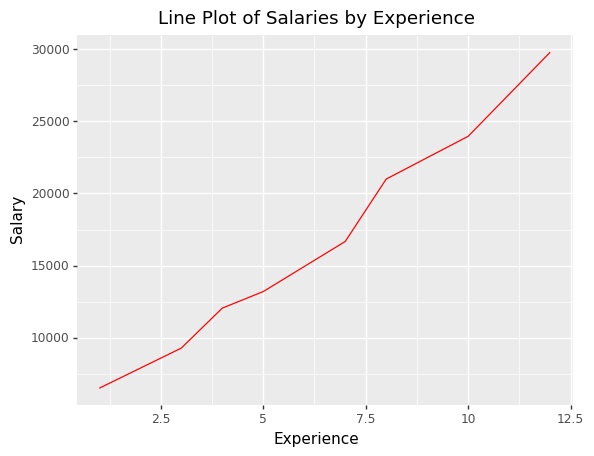

In [715]:
(line_plot + 
 plotnine.geom_line(color='red') + 
 # labels
 plotnine.labs(title='Line Plot of Salaries by Experience')).draw();

We can also create multiple line plots.

In [721]:
experience = [1,3,4,5,7,8,10,12]

data_scientists_salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

software_engineers_salary = [9020, 12873, 15725, 18000, 19790, 20196, 25769,32000 ]

salaries_df = pd.DataFrame({"Experience":experience,"Data Scientists Salary": data_scientists_salary,
                           "Software Engineers Salary":software_engineers_salary})

In [722]:
salaries_df.head()

,Experience,Data Scientists Salary,Software Engineers Salary
0,1,6500,9020
1,3,9280,12873
2,4,12050,15725
3,5,13200,18000
4,7,16672,19790


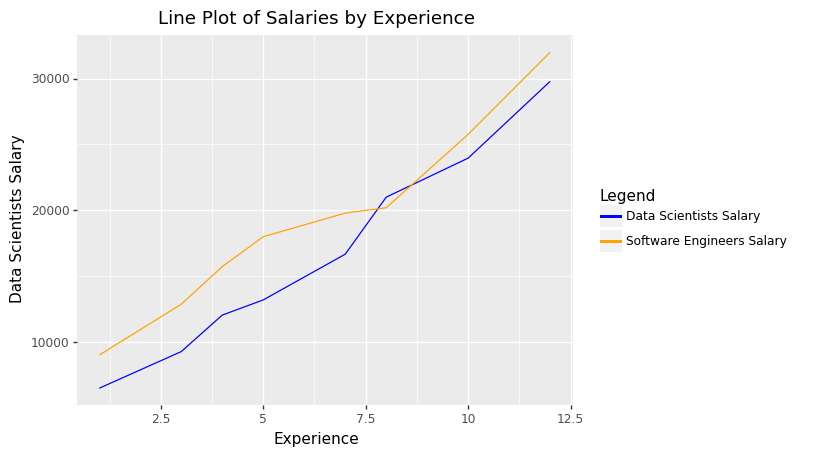

In [723]:
(ggplot() + 
 plotnine.geom_line(data=salaries_df, mapping=aes(x='Experience', y='Data Scientists Salary', color="'blue'")) +
 plotnine.geom_line(data=salaries_df, mapping=aes(x='Experience', y='Software Engineers Salary', color="'orange'")) +
 plotnine.labs(title='Line Plot of Salaries by Experience') +
 plotnine.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange'],
                               labels=['Data Scientists Salary','Software Engineers Salary'])).draw();

We can save the plot as an image by using **save()** function.

In [726]:
img =(ggplot() + 
 plotnine.geom_line(data=salaries_df, mapping=aes(x='Experience', y='Data Scientists Salary', color="'blue'")) +
 plotnine.geom_line(data=salaries_df, mapping=aes(x='Experience', y='Software Engineers Salary', color="'orange'")) +
 plotnine.labs(title='Line Plot of Salaries by Experience') +
 plotnine.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange'],
                               labels=['Data Scientists Salary','Software Engineers Salary']))

img.save(filename = "image.png")

/Users/berkay/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/berkay/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: image.png


## Bar Plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

In [756]:
x = pd.Series(["A", "B", "C", "D", "B", "C", "D","A","A","B", "C", "D", "B", "C", "D","A","A","B", "C", "D"])
y = pd.Series([3, 8, 1, 10,5,3,6,8,10,3,9,2,8,10,3,9,2])
df= pd.DataFrame({"Letters":x,"Numbers":y})

df.index = x

In [757]:
df.head()

,Letters,Numbers
A,A,3.0
B,B,8.0
C,C,1.0
D,D,10.0
B,B,5.0


/Users/berkay/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_count : Removed 3 rows containing non-finite values.


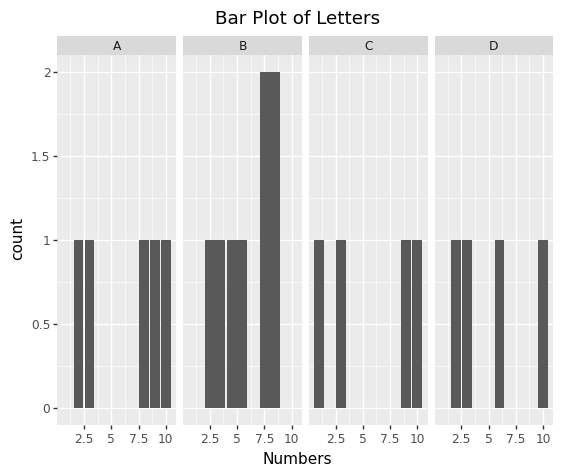

In [758]:
# create new ggplot object
bar_plot = ggplot(data=df, mapping=aes(x='Numbers'))

# add layers
(bar_plot + 
 plotnine.geom_bar() + 
 plotnine.labs(title='Bar Plot of Letters') +
 plotnine.facet_grid('~Letters')).draw();

For a real world example, we will work with Human Resources Data Set.

Dataset can be downloaded from here : https://www.kaggle.com/rhuebner/human-resources-data-set

We will read it with pandas.

In [759]:
df = pd.read_csv("HRDataset_v14.csv")

In [760]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


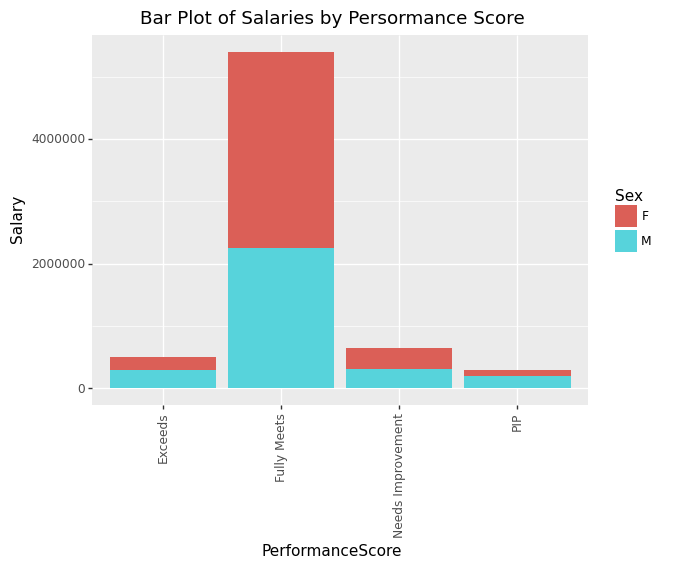

In [761]:
(plotnine.ggplot(data=df.dropna(), mapping=aes(x='PerformanceScore', y='Salary', fill='Sex')) + 
 plotnine.geom_col() +
 plotnine.labs(title='Bar Plot of Salaries by Persormance Score') +
 plotnine.theme(axis_text_x=plotnine.element_text(rotation=90))).draw();

## Scatter Plot

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another.

In [797]:
experience = [1,2,3,4,5,6,7,8]

data_scientists_salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

df = pd.DataFrame({"experience":experience,"data_scientists_salary":data_scientists_salary})

In [798]:
df.head()

,experience,data_scientists_salary
0,1,6500
1,2,9280
2,3,12050
3,4,13200
4,5,16672


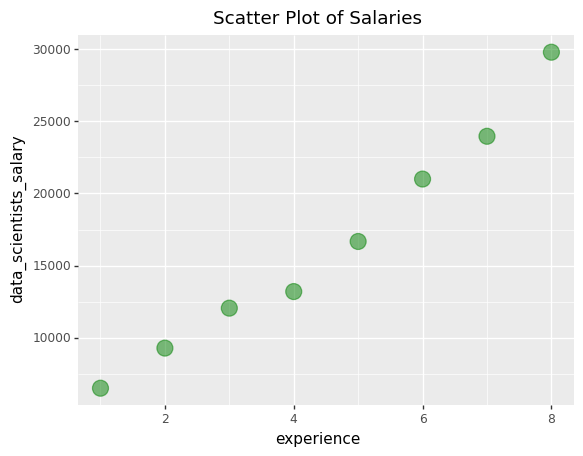

In [799]:
scatter_plot = ggplot(data=df,mapping=aes(x="experience", y="data_scientists_salary"))

# add layers
(scatter_plot + 
 plotnine.labs(title='Scatter Plot of Salaries') +
 plotnine.geom_point(shape='o', size=6, color='green', alpha=0.5)).draw();

For a real world example, we will work with Human Resources Data Set.

Dataset can be downloaded from here : https://www.kaggle.com/rhuebner/human-resources-data-set

We will read it with pandas.

In [772]:
df = pd.read_csv("HRDataset_v14.csv")

In [773]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


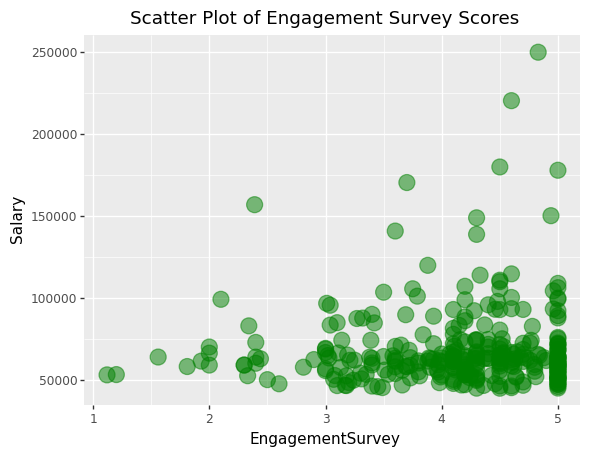

In [774]:
scatter_plot = ggplot(data=df,mapping=aes(x="EngagementSurvey", y="Salary"))

# add layers
(scatter_plot + 
 plotnine.labs(title='Scatter Plot of Engagement Survey Scores') +
 plotnine.geom_point(shape='o', size=6, color='green', alpha=0.5)).draw();

We can also map EmpSatisfaction to color scheme and PerformanceScore to size.

/Users/berkay/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using alpha for a discrete variable is not advised.


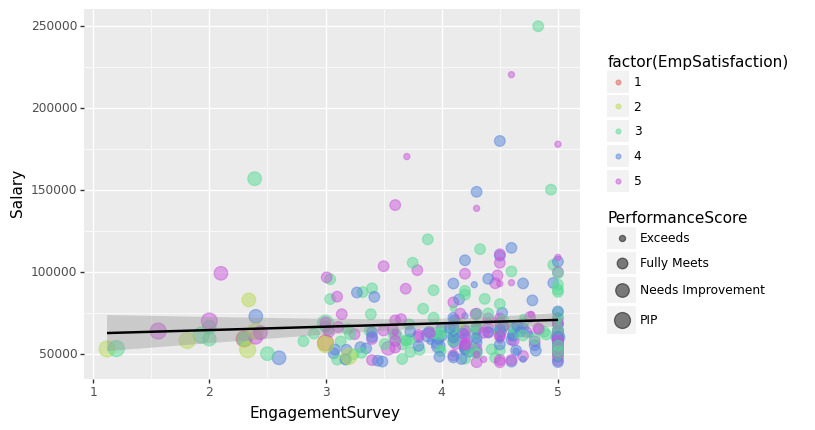

In [776]:
(scatter_plot + 
 plotnine.geom_point(aes(color='factor(EmpSatisfaction)', size='PerformanceScore'), alpha=0.5) +
 plotnine.stat_smooth(method='lm')).draw();

## Histogram

A histogram is a graph showing frequency distributions.

It is a graph showing the number of observations within each given interval.

In [800]:
letters = pd.DataFrame({"Letters":["A", "B", "C", "D","A", "B", "C", "D","A", "B", "C", "A",
                                  "A", "B", "A", "B", "A", "A", "C", "D"],
                        "Numbers":[3, 8, 1, 103, 8, 1, 10,3, 8, 1, 10,3, 8, 1, 10,3, 8, 1, 1,20]})

In [801]:
letters.head()

,Letters,Numbers
0,A,3
1,B,8
2,C,1
3,D,103
4,A,8


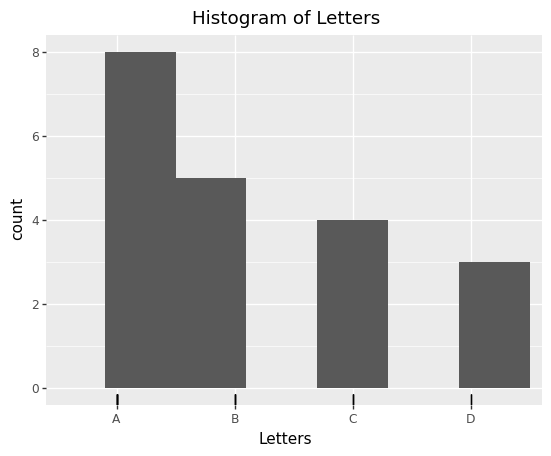

In [803]:
# create new ggplot object
histogram = ggplot(data=letters, mapping=aes(x="Letters"))

# add layers
(histogram +
 plotnine.labs(title='Histogram of Letters') +
 plotnine.geom_histogram(bins=6) +
 plotnine.geom_rug()).draw();

## Density plots

In [805]:
df = pd.DataFrame({"notes":[32,21,32,84,77,64,99,42,65,24,65,77,43,84]})

In [807]:
df.head()

,notes
0,32
1,21
2,32
3,84
4,77


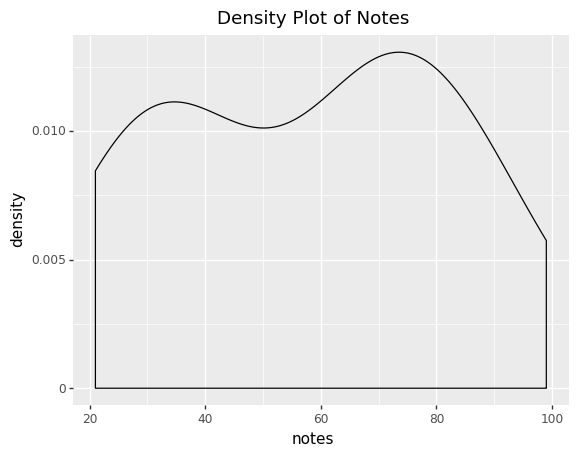

In [808]:
kde = ggplot(data=df,mapping = aes(x="notes"))

(kde + plotnine.geom_density()+
 plotnine.labs(title='Density Plot of Notes')).draw();

## Box Plot

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

In [835]:
first_notes = [11, 13, 23, 34, 38, 54, 55, 64, 76, 79, 82, 95, 97, 98, 100,86]

second_notes = [74,13,23,53,64,32,64,86,65,33,13,64,99,32,63,65]

final_notes = [53,43,65,12,76,34,12,43,65,32,54,76,98,12,32,75]

Letter_Note = ["AA","BA","CD","BB","BA","CA","BA","CD","AA","BA","CA","BA","CD","BB","BA","BB"]

notes = pd.DataFrame({"First Notes":first_notes,"Second Notes":second_notes,"Final Notes":final_notes,
                      "Letter Notes": Letter_Note},
                    columns=["First Notes","Second Notes","Final Notes","Letter Notes"])

In [836]:
notes.head()

,First Notes,Second Notes,Final Notes,Letter Notes
0,11,74,53,AA
1,13,13,43,BA
2,23,23,65,CD
3,34,53,12,BB
4,38,64,76,BA


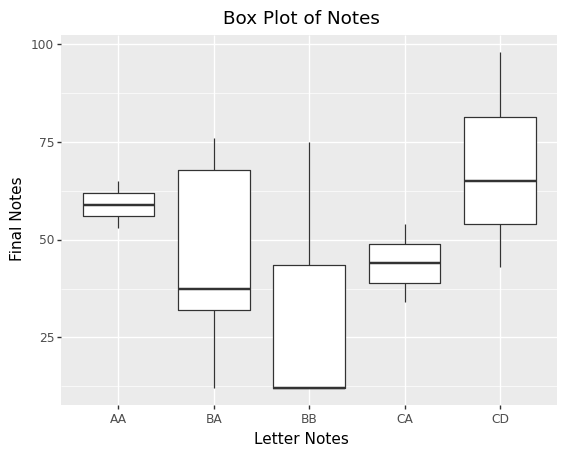

In [837]:
boxp = ggplot(data=notes,mapping=aes(x="Letter Notes",y="Final Notes"))

(boxp + plotnine.geom_boxplot()+
 plotnine.labs(title='Box Plot of Notes')).draw();

## Violin Plot

Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots.

In [830]:
df = pd.DataFrame({"First":[0,3,6,9,13,15,19,23,26,29,33,35,39,41,47,56],
                  "Second":[5,8,13,16,17,20,25,26,30,33,37,39,41,44,48,59],
                  "Class": ["A","C","B","C","C","A","B","A","B","C","C","A","B","B","C","A"]})

In [831]:
df.head()

,First,Second,Class
0,0,5,A
1,3,8,C
2,6,13,B
3,9,16,C
4,13,17,C


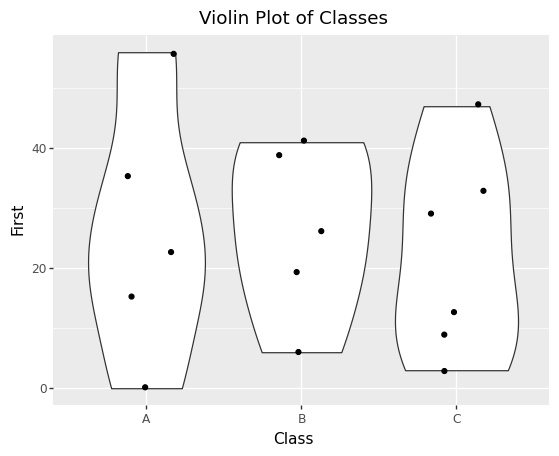

In [838]:
# create new ggplot object
violin_plot = ggplot(data=df, mapping=aes(x='Class', y='First'))

# add layers
(violin_plot + 
 plotnine.geom_violin()+
 plotnine.labs(title='Violin Plot of Classes') +
 # scatter plot with points jittered to reduce overplotting (similar to seaborn stripplot)
 plotnine.geom_jitter(position=plotnine.position_jitter(0.2))).draw();